In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp

\begin{aligned}
\frac{dS}{dt} &= -\beta S I, \\
\frac{dI}{dt} &= \beta S I - \gamma I, \\
\frac{dR}{dt} &= \gamma I,
\end{aligned}

In [2]:
def SIR(t, Z, beta, gamma):
    S, I, R = Z
    fraction_of_suseptible = -beta * S * I
    fraction_of_infected = beta * S * I - gamma * I
    fraction_of_recovering = gamma * I
    return [fraction_of_suseptible, fraction_of_infected, fraction_of_recovering]

In [67]:
# Setup initial conditions
S0 = 0.99
I0 = 0.01
R0 = 0.0
y0 = [S0, I0, R0]

# beta_values = [0.001, 0.1, 0.7,] # Rate of infection
# gamma_values = [0.001, 0.01, 0.05]  # Rate of recovery
beta_values = [0.8, 0.3, 0.03]
gamma_values = [0.6, 0.1, 0.001]

max_time = 356 # in days
STEPS = 1000
t_span = np.linspace(0, max_time, STEPS)


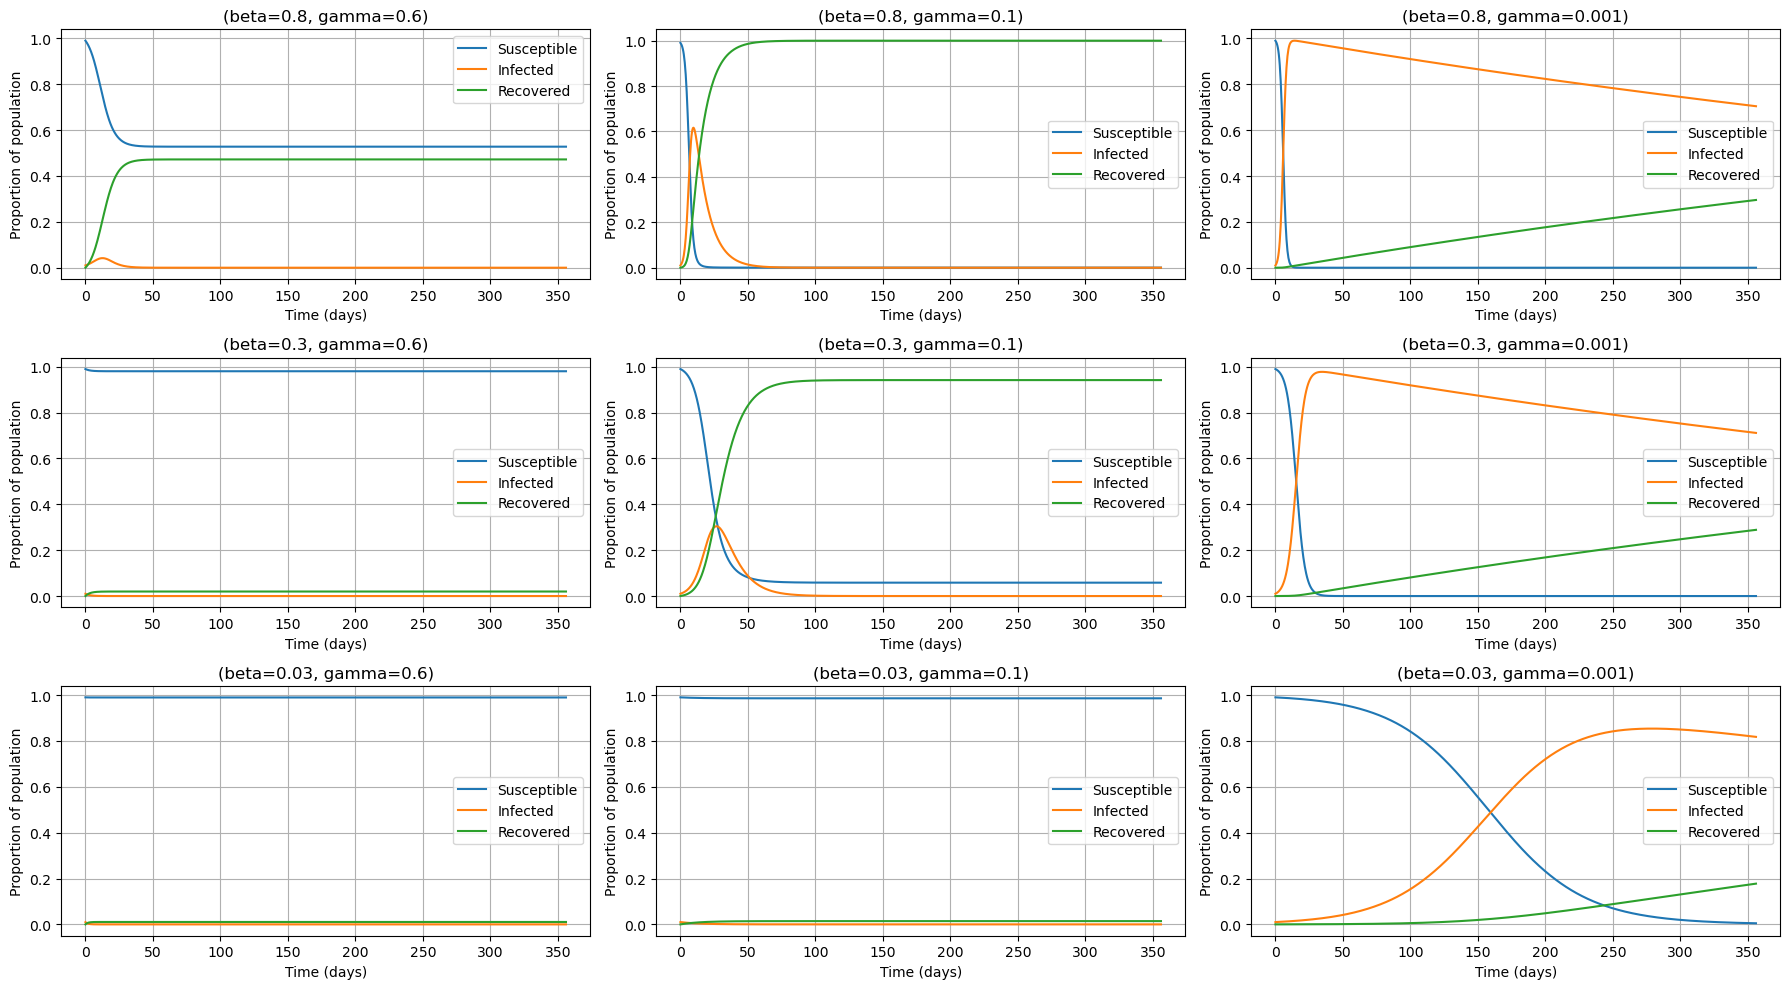

In [68]:
fig, axs = plt.subplots(len(beta_values), len(gamma_values), figsize=(18, 10))
axs = axs.ravel()
i = 0
for beta in beta_values:
    for gamma in gamma_values:
        sol = solve_ivp(SIR, [0, max_time], y0, args=(beta, gamma), t_eval=t_span, dense_output=True)
        S, I, R = sol.sol(t_span)

        axs[i].plot(t_span, S, label="Susceptible")
        axs[i].plot(t_span, I, label="Infected")
        axs[i].plot(t_span, R, label="Recovered")
        axs[i].set_xlabel("Time (days)")
        axs[i].set_ylabel("Proportion of population")
        axs[i].set_title(f"(beta={beta}, gamma={gamma})")
        axs[i].legend()
        axs[i].grid(True)

        i+=1

plt.tight_layout()
plt.show()

In [144]:
def downsample(arr, size, scaler):
    step = len(arr) // size
    downsampled_data = arr[::step][:size] * scaler
    return downsampled_data

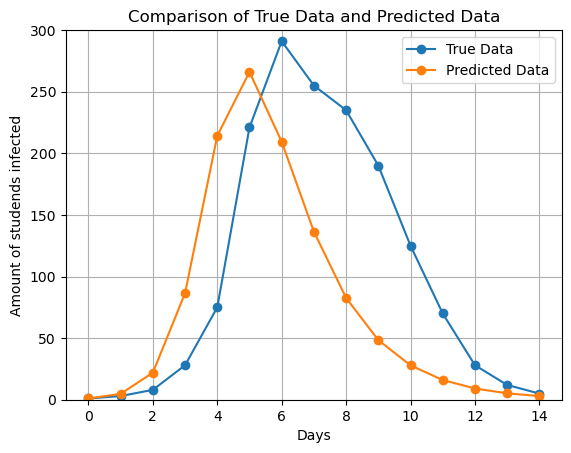

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
predicted,1.0,5.0,22.0,86.0,214.0,266.0,209.0,136.0,83.0,48.0,28.0,16.0,9.0,5.0,3.0
true,1.0,3.0,8.0,28.0,75.0,221.0,291.0,255.0,235.0,190.0,125.0,70.0,28.0,12.0,5.0


In [161]:
# Setup initial conditions
N = 763
init_infected = 1
I0 = init_infected / N
S0 = (N - init_infected) / N
R0 = 0.0
y0 = [S0, I0, R0]

beta = 2.4 # Rate of infection
gamma =  0.7 # Rate of recovery

max_time = 14 # in days
STEPS = 1000
t_span = np.linspace(0, max_time, STEPS)

sol = solve_ivp(SIR, [0, max_time], y0, args=(beta, gamma), t_eval=t_span, dense_output=True)
S, I, R = sol.sol(t_span)

true_arr = np.array([1, 3, 8, 28, 75, 221, 291, 255, 235, 190, 125, 70, 28, 12, 5])
predict_arr = downsample(I, size=15, scaler=N)

y_min = 0
y_max = 300

x = columns=np.arange(0, max_time + 1)
plt.plot(x, true_arr, marker='o', label='True Data')
plt.plot(x, predict_arr, marker='o', label='Predicted Data')
plt.xlabel('Days')
plt.ylabel('Amount of studends infected')
plt.title('Comparison of True Data and Predicted Data')
plt.ylim(y_min, y_max)
plt.legend()

# Show plot
plt.grid(True)
plt.show()
df = pd.DataFrame([np.round(predict_arr), true_arr], columns=np.arange(0, max_time + 1))
df.index = ['predicted', 'true']
df

In [162]:
from sklearn.metrics import mean_squared_error
mean_squared_error(true_arr, predict_arr)


6786.964892227962

In [164]:
import numpy as np

def gradient_descent():
    for i in range(num_iterations):
        sol = solve_ivp(SIR, [0, max_time], y0, args=(beta, gamma), t_eval=t_span, dense_output=True)
        y_pred = sol.sol(t_span)[1]

X = predict_arr
y = true_arr
initial_theta = [0,0]
learning_rate = 0.01
num_iterations = 1000

# Perform gradient descent
optimal_theta, cost_history = gradient_descent(X, y, initial_theta, learning_rate, num_iterations)

print("--------------------")
print("Optimal Parameters:", optimal_theta)

ValueError: shapes (15,) and (2,) not aligned: 15 (dim 0) != 2 (dim 0)